## Final Project Submission

Please fill out:
* Student name: **David Githaiga Maina**
* Student pace: **Part time**
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**Research Questions**
1. Which genres are most popular for all-time? 
2. Is movie production budget directly related to the popularity/gross revenue?
3. Which cast and crew are associated with the most popular movies?

In [45]:
#import required modules
import gzip
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [62]:
plt.style.use('seaborn-v0_8')

In [2]:
#Load tmdb.movies.csv.gz file
with gzip.open('zippedData/tmdb.movies.csv.gz', 'r') as f:
    tmdb_movies = pd.read_csv(f, index_col= 0)

In [3]:
tmdb_movies.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [4]:
#filter to take only movies subset with vote count that is higher than the average 
tmdb_movies = tmdb_movies[tmdb_movies['vote_count'] > tmdb_movies['vote_count'].mean()]

In [5]:
#function for loading api key file that will be used to request tmdb for genres ids to use with the tmdb.movies set
def get_keys(path):
    with open(path) as f:
        return json.load(f)

keys = get_keys('/Users/dave/.secret/tmdb_api.json')
api_key = keys['api_key']

In [6]:
#Request tmdb for genres ids
url = "https://api.themoviedb.org/3/genre/movie/list?language=en"

headers = {
    "accept": "application/json",
    "Authorization": "Bearer {}".format(api_key)
}

response = requests.get(url, headers=headers)

In [7]:
#load the json format of the response from the api call into a dataframe
tmdb_genre_ids = pd.DataFrame(response.json()['genres'])
tmdb_genre_ids.head()

id       name
0  28     Action
1  12  Adventure
2  16  Animation
3  35     Comedy
4  80      Crime

In [8]:
#Define a function that processes tmdb_movies['genre_ids'] values, which are currently of object dtype, into lists 
def process_genre_ids(index):
    ids = list(index.replace("[","").replace("]","").split(','))
    return [int(num.strip()) for num in ids if num.strip()]

# Apply the function to every element in tmdb_movies['genre_ids']
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(process_genre_ids)

In [9]:
#Create a new column in tmdb.movies that will hold translated values of genre names from the genre_ids 
# Create a function to extract the genre names
def get_genre_names(genre_ids):
    genre_names = []
    for genre_id in genre_ids:
        if genre_id in tmdb_genre_ids['id'].values:
            genre_index = tmdb_genre_ids[tmdb_genre_ids['id'] == genre_id].index[0]
            genre_names.append(tmdb_genre_ids.loc[genre_index, 'name'])
    return genre_names

# Apply the function to the 'genre_ids' column and assign the result to 'genre' column
tmdb_movies['genre'] = tmdb_movies['genre_ids'].apply(lambda x: get_genre_names(x))

In [10]:
tmdb_movies.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  \
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                      How to Train Your Dragon           7.7        7610   
2                                    Iron Man 2           6.8       12368   
3                                     Toy Story           7.9       10174   
4                                     Inception           8.3       22186   

                                     genre  
0             [Adventure, Fantasy, Family]  
1  [Fantasy, Adventure, Animation, Family]  
2     [Adventure, Action, Science Fiction]  
3              [Animation, Comedy, Family]  
4     [Action, Science Fiction, Adventure]

In [11]:
#Load imdb.title.ratings.csv.gz
with gzip.open('zippedData/imdb.title.ratings.csv.gz', 'r') as f:
    imdb_movies_ratings = pd.read_csv(f)

In [12]:
imdb_movies_ratings.head()

tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

In [13]:
#Load imdb.title.basics.csv.gz
with gzip.open('zippedData/imdb.title.basics.csv.gz', 'r') as f:
    imdb_title_basics = pd.read_csv(f)

In [14]:
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [15]:
#concatenate imdb_title_basics and imdb.title.ratings on the 'tconst' column
imdb_movies = pd.concat([imdb_title_basics.set_index('tconst'), imdb_movies_ratings.set_index('tconst')], axis= 1)

In [16]:
imdb_movies.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  averagerating  \
tconst                                                                        
tt0063540        2013            175.0    Action,Crime,Drama            7.0   
tt0066787        2019            114.0       Biography,Drama            7.2   
tt0069049        2018            122.0                 Drama            6.9   
tt0069204        2018              NaN          Comedy,Drama            6.1   
tt0100275        2017             80.0  Comedy,Drama,Fantasy            6.5   

           numvotes  
tconst               
tt0063540      77.0  
tt0066787      43.0  
tt0069049    4517.0  
tt0069204      13.0  
tt0100275     119.0

In [17]:
imdb_movies.shape

(146144, 7)

In [18]:
imdb_movies = imdb_movies[imdb_movies['numvotes'] > imdb_movies['numvotes'].mean()]

In [19]:
imdb_movies.shape

(4751, 7)

In [20]:
#aggregate imdb movies by genre and find the averages of ratings and number of votes per group
imdb_genre_aggregate = imdb_movies[['genres', 'averagerating', 'numvotes']].groupby('genres').agg(
    mean_average_rating=('averagerating', 'mean'),
    mean_num_votes=('numvotes', 'mean')
)
#sort values by average ratings
imdb_genre_aggregate.sort_values(by= imdb_genre_aggregate.columns[0], ascending= False)

mean_average_rating  mean_num_votes
genres                                                          
Biography                                    8.6          3879.0
Drama,Romance,Sport                          8.5          4098.0
Animation,History                            8.3          7451.0
Documentary,Family                           8.3          3820.0
Adventure,Documentary,Sport                  8.3          7288.0
...                                          ...             ...
Action,Adventure,History                     4.5          7523.0
Crime,Romance,Thriller                       4.3          8782.0
Comedy,Romance,Sci-Fi                        4.2          4953.0
Comedy,Family,Sci-Fi                         2.6          4552.0
Crime,Mystery                                1.5         26723.0

[383 rows x 2 columns]

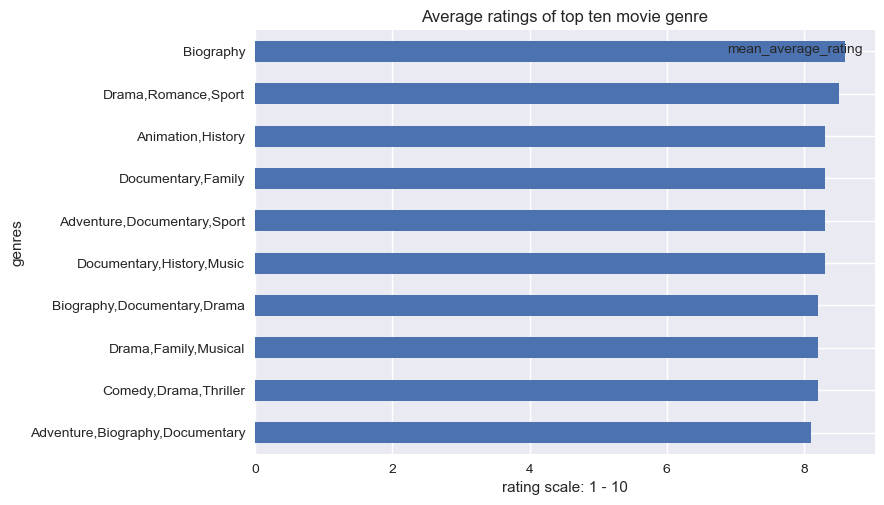

In [69]:
#plot for the top ten (10) most rated genres on imdb movies
imdb_genre_aggregate.sort_values(by= imdb_genre_aggregate.columns[0], ascending= False, inplace= True)
imdb_genre_aggregate[:10].plot(kind= 'barh', y=imdb_genre_aggregate.columns[0])
plt.gca().invert_yaxis()
plt.title('Average ratings of top ten movie genre')
plt.xlabel('rating scale: 1 - 10');

In [22]:
#Similarly to tmdb.movies, also aggregate tmdb.movies by genre and find the averages of ratings and number of votes per genre
#First convert the values of the tmdb genre column into a string objects instead of lists so the column takes a similar dtype 
#as that of the imdb.movies genre column
tmdb_movies['genre'] = tmdb_movies['genre'].apply(lambda x: ','.join(x))

#group by genre
tmdb_genre_aggregate = tmdb_movies[['vote_average','vote_count','genre']].groupby('genre').agg(
    {'vote_average':['mean'],'vote_count':['mean']})
tmdb_genre_aggregate.sort_values(by= tmdb_genre_aggregate.columns[0], ascending= False)

vote_average vote_count
                                                          mean       mean
genre                                                                    
Romance,Animation,Drama                                    8.6     4161.0
Action,Adventure,Animation,Science Fiction,Comedy          8.4     4048.0
Drama,Animation,Romance                                    8.3     1034.0
Family,Animation,Romance,Comedy                            8.3      684.0
Thriller,Drama,Romance                                     8.3     1213.0
...                                                        ...        ...
Action,TV Movie,Science Fiction,Comedy,Adventure           4.3      246.0
Fantasy,Horror,Mystery,Thriller                            4.2     2475.0
Action,Horror                                              4.1      238.0
Mystery,Adventure,Comedy,Crime                             4.1      217.0
Science Fiction,TV Movie,Action,Adventure,Comedy           3.8      873.0

[822 rows x 2 columns]

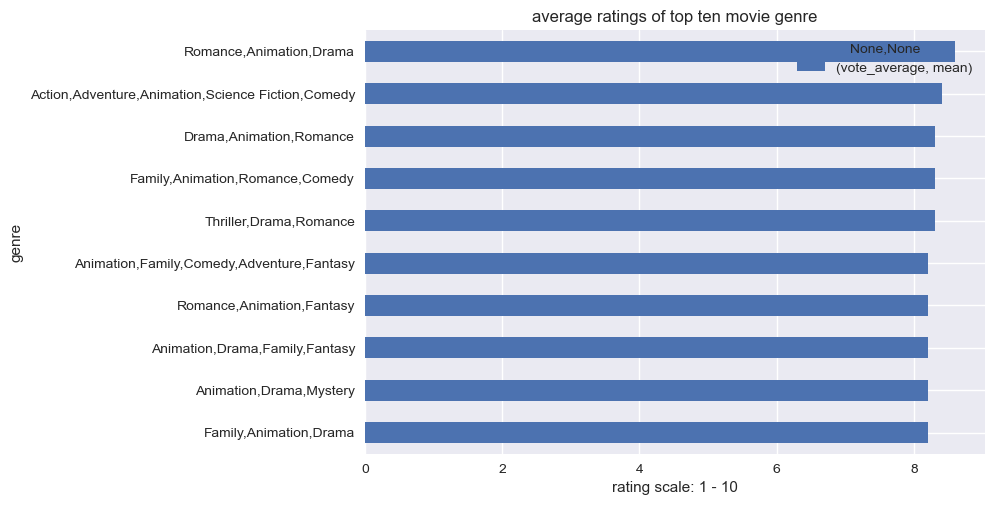

In [70]:
#Similarly as done for the imdb data, also plot for the top ten (10) most rated genres on tmdb movies
tmdb_genre_aggregate.sort_values(by= tmdb_genre_aggregate.columns[0], ascending= False, inplace= True)
tmdb_genre_aggregate[:10].plot(kind= 'barh', y= tmdb_genre_aggregate.columns[0])
plt.gca().invert_yaxis()
plt.title('average ratings of top ten movie genre')
plt.xlabel('rating scale: 1 - 10');

In [28]:
#Check to see if there are genres whose ratings have a trend over the years
#First group by year of release
imdb_rating_by_year = imdb_movies[['start_year','genres','averagerating','numvotes']].groupby(['genres','start_year']).agg({'averagerating':['mean'],'numvotes':['mean']})
imdb_rating_by_year.head()

averagerating      numvotes
                           mean          mean
genres start_year                            
Action 2010            3.850000   8532.000000
       2011            5.500000   7592.000000
       2012            5.650000  38569.000000
       2013            5.333333   6815.666667
       2015            7.200000  21092.000000

In [29]:
#The same with tmdb movies
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_rating_by_year = tmdb_movies[['release_date','vote_average','vote_count','genre']].groupby(['genre','release_date']).agg({'vote_average':['mean'],'vote_count':['mean']})
tmdb_rating_by_year.head()

vote_average vote_count
                            mean       mean
genre  release_date                        
Action 2012-01-01            6.0      713.0
       2012-11-02            5.3      573.0
       2015-02-27            4.7      223.0
       2015-07-14            4.6      213.0
       2015-07-31            7.1     5242.0

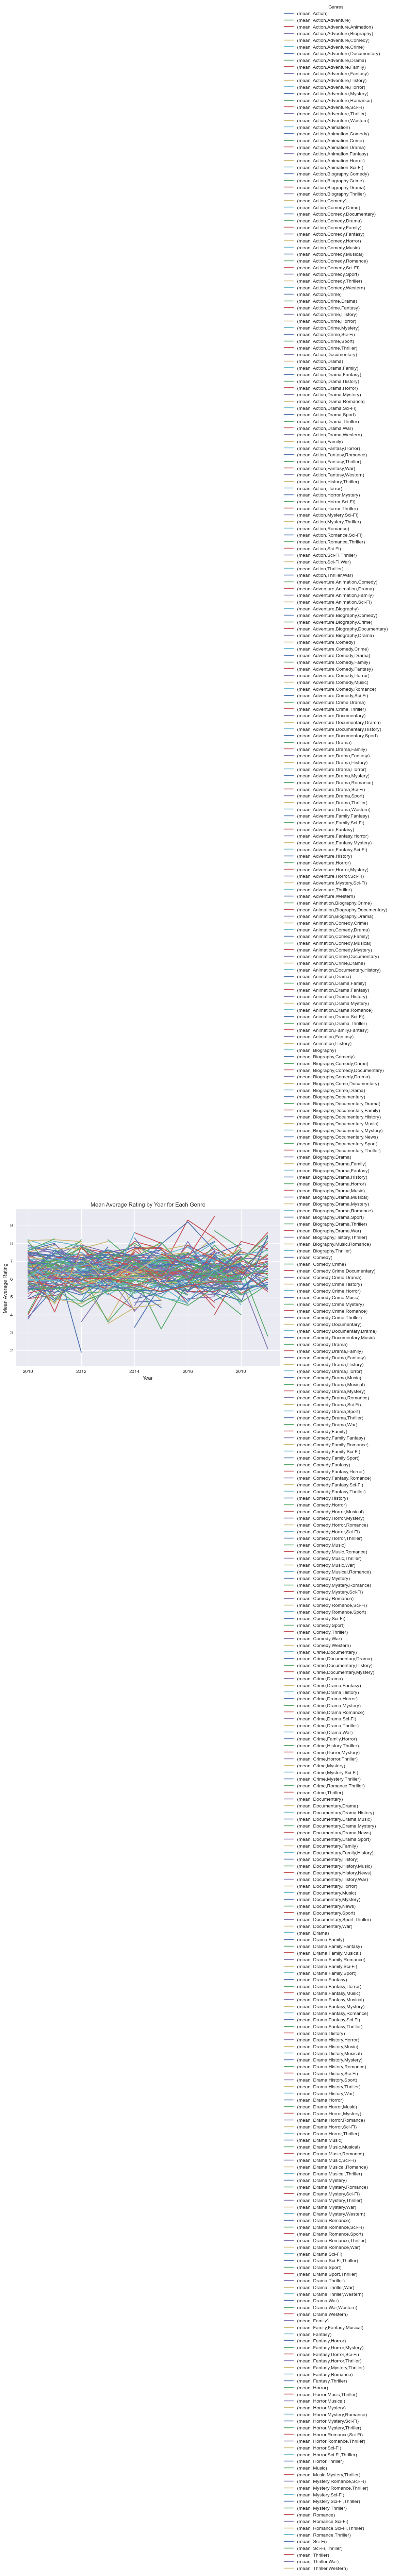

In [66]:
pivot_imdb = imdb_rating_by_year.pivot_table(index='start_year', columns='genres', values='averagerating')

# Plot the data
pivot_imdb.plot(figsize=(10, 6))
plt.title('Mean Average Rating by Year for Each Genre')
plt.xlabel('Year')
plt.ylabel('Mean Average Rating')
plt.legend(title='Genres', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

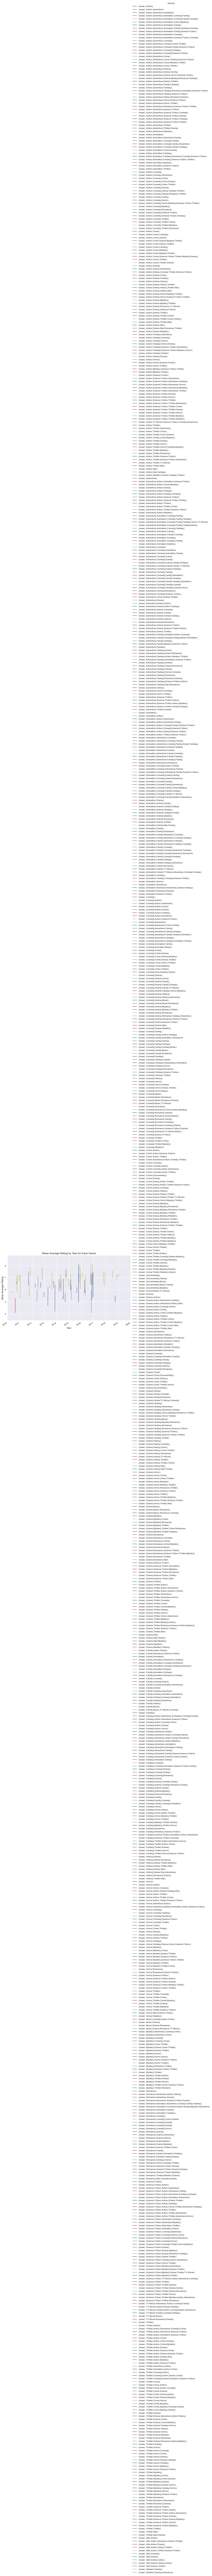

In [65]:
pivot_tmdb = tmdb_rating_by_year.pivot_table(index='release_date', columns='genre', values='vote_average')

# Plot the data
pivot_tmdb.plot(figsize=(10, 6))
plt.xlim('2010-01-01','2020-01-01')
plt.title('Mean Average Rating by Year for Each Genre')
plt.xlabel('Year')
plt.ylabel('Mean Average Rating')
plt.legend(title='Genres', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Research Question 2:** Is movie production budget directly related to its gross revenue?

In [38]:
#load tn.movie budgets
with gzip.open('zippedData/tn.movie_budgets.csv.gz') as f:
    tn_movie_budgets = pd.read_csv(f)
tn_movie_budgets.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [39]:
#load bom.movie gross for movie revenues
with gzip.open('zippedData/bom.movie_gross.csv.gz') as f:
    bom_movies_gross = pd.read_csv(f)
bom_movies_gross.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [40]:
movies_budget_and_revenue = pd.merge(tn_movie_budgets, bom_movies_gross, left_on= 'movie', right_on= 'title', how= 'inner')
movies_budget_and_revenue.drop(['domestic_gross_x','title'], axis= 1, inplace= True)
movies_budget_and_revenue.rename(columns={'domestic_gross_y': 'domestic_gross'}, inplace= True)
movies_budget_and_revenue.head()

id  release_date                                        movie  \
0   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
1   4   May 1, 2015                      Avengers: Age of Ultron   
2   7  Apr 27, 2018                       Avengers: Infinity War   
3   9  Nov 17, 2017                               Justice League   
4  10   Nov 6, 2015                                      Spectre   

  production_budget worldwide_gross studio  domestic_gross foreign_gross  year  
0      $410,600,000  $1,045,663,875     BV     241100000.0     804600000  2011  
1      $330,600,000  $1,403,013,963     BV     459000000.0     946400000  2015  
2      $300,000,000  $2,048,134,200     BV     678800000.0       1,369.5  2018  
3      $300,000,000    $655,945,209     WB     229000000.0     428900000  2017  
4      $300,000,000    $879,620,923   Sony     200100000.0     680600000  2015

In [41]:
movies_budget_and_revenue['production_budget'] = movies_budget_and_revenue['production_budget'].apply(lambda x: x.replace("$","").replace(",",""))
movies_budget_and_revenue['worldwide_gross'] = movies_budget_and_revenue['worldwide_gross'].apply(lambda x: x.replace("$","").replace(",",""))
movies_budget_and_revenue.head()

id  release_date                                        movie  \
0   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
1   4   May 1, 2015                      Avengers: Age of Ultron   
2   7  Apr 27, 2018                       Avengers: Infinity War   
3   9  Nov 17, 2017                               Justice League   
4  10   Nov 6, 2015                                      Spectre   

  production_budget worldwide_gross studio  domestic_gross foreign_gross  year  
0         410600000      1045663875     BV     241100000.0     804600000  2011  
1         330600000      1403013963     BV     459000000.0     946400000  2015  
2         300000000      2048134200     BV     678800000.0       1,369.5  2018  
3         300000000       655945209     WB     229000000.0     428900000  2017  
4         300000000       879620923   Sony     200100000.0     680600000  2015

In [43]:
movies_budget_and_revenue['production_budget'] = movies_budget_and_revenue['production_budget'].astype('float')
movies_budget_and_revenue['worldwide_gross'] = movies_budget_and_revenue['worldwide_gross'].astype('float')
movies_budget_and_revenue['year'] = movies_budget_and_revenue['year'].astype('int')

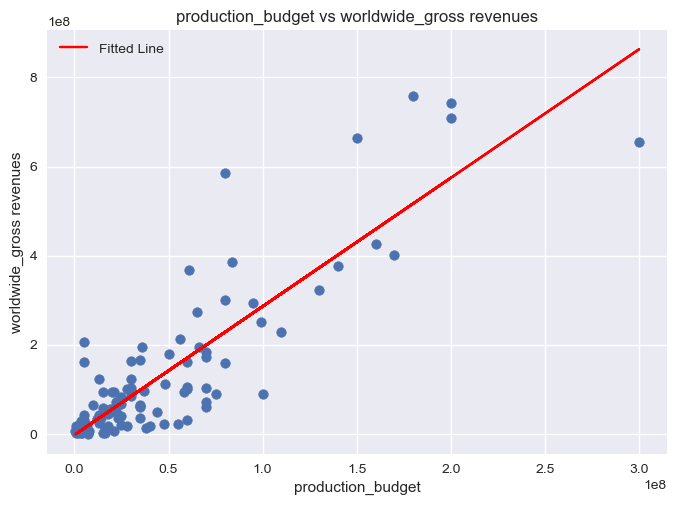

In [63]:
sample_movies = movies_budget_and_revenue.sample(n=100)
plt.scatter(sample_movies['production_budget'], sample_movies['worldwide_gross'])

# Define the line equation: y = mx + b
m, b = np.polyfit(sample_movies['production_budget'], sample_movies['worldwide_gross'], 1)  # Fit a first-degree (linear) polynomial

# Create the line
line = m * sample_movies['production_budget'] + b

# Plot the line
plt.plot(sample_movies['production_budget'], line, color='red', label='Fitted Line')

# Add labels and a legend
plt.xlabel('production_budget')
plt.ylabel('worldwide_gross revenues')
plt.title('production_budget vs worldwide_gross revenues')
plt.legend()

# Show the plot
plt.show();

**Reserch Question 3:** Which cast and crew are associated with the most popular movies?

In [51]:
#join imdb.title.principles and imdb.name.basics
with gzip.open('zippedData/imdb.title.principals.csv.gz') as f:
    imdb_title_principals = pd.read_csv(f)
with gzip.open('zippedData/imdb.name.basics.csv.gz') as f:
    imdb_name_basics = pd.read_csv(f)

In [52]:
imdb_title_principals.head()

tconst  ordering     nconst  category       job        characters
0  tt0111414         1  nm0246005     actor       NaN       ["The Man"]
1  tt0111414         2  nm0398271  director       NaN               NaN
2  tt0111414         3  nm3739909  producer  producer               NaN
3  tt0323808        10  nm0059247    editor       NaN               NaN
4  tt0323808         1  nm3579312   actress       NaN  ["Beth Boothby"]

In [53]:
imdb_name_basics.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [54]:
#merge imdb.title.principals and imdb_name_basics on the nconst column into a dataframe called movie_principals
movie_principals = pd.merge(imdb_title_principals, imdb_name_basics, on ='nconst', how= 'inner')
movie_principals.head()

tconst  ordering     nconst  category       job   characters  \
0  tt0111414         1  nm0246005     actor       NaN  ["The Man"]   
1  tt0111414         2  nm0398271  director       NaN          NaN   
2  tt5573596         5  nm0398271  director       NaN          NaN   
3  tt0111414         3  nm3739909  producer  producer          NaN   
4  tt0323808        10  nm0059247    editor       NaN          NaN   

            primary_name  birth_year  death_year  \
0           Tommy Dysart         NaN         NaN   
1           Frank Howson      1952.0         NaN   
2           Frank Howson      1952.0         NaN   
3  Barry Porter-Robinson         NaN         NaN   
4            Sean Barton      1944.0         NaN   

                               primary_profession  \
0                                           actor   
1                           actor,writer,producer   
2                           actor,writer,producer   
3                         producer,art_department   
4  editor,editorial_department,assistant_director   

                          known_for_titles  
0  tt0093120,tt0076974,tt0084296,tt0077064  
1  tt0104271,tt0094789,tt0102076,tt0111414  
2  tt0104271,tt0094789,tt0102076,tt0111414  
3  tt0290884,tt0101374,tt0111414,tt1566940  
4  tt0402910,tt1022883,tt0086190,tt0490181

In [55]:
#load imdb.title.akas
with gzip.open('zippedData/imdb.title.akas.csv.gz') as f:
    imdb_title_akas = pd.read_csv(f)
imdb_title_akas.head()

title_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg          NaN          NaN                0.0  
1      NaN  imdbDisplay          NaN                0.0  
2      NaN  imdbDisplay          NaN                0.0  
3      NaN          NaN  short title                0.0  
4      NaN  imdbDisplay          NaN                0.0

In [56]:
#include imdb.title.akas in the merge
movie_principals = pd.merge(movie_principals,imdb_title_akas, left_on= 'tconst', right_on= 'title_id', how= 'inner')
movie_principals = movie_principals[['tconst', 'nconst', 'primary_name', 'primary_profession', 'known_for_titles', 'title']]
movie_principals.head()

tconst     nconst           primary_name  \
0  tt0111414  nm0246005           Tommy Dysart   
1  tt0111414  nm0398271           Frank Howson   
2  tt0111414  nm3739909  Barry Porter-Robinson   
3  tt5573596  nm0398271           Frank Howson   
4  tt5573596  nm0000476         Sally Kirkland   

               primary_profession                         known_for_titles  \
0                           actor  tt0093120,tt0076974,tt0084296,tt0077064   
1           actor,writer,producer  tt0104271,tt0094789,tt0102076,tt0111414   
2         producer,art_department  tt0290884,tt0101374,tt0111414,tt1566940   
3           actor,writer,producer  tt0104271,tt0094789,tt0102076,tt0111414   
4  actress,producer,miscellaneous  tt0315327,tt0092569,tt3216866,tt0102138   

               title  
0        A Thin Life  
1        A Thin Life  
2        A Thin Life  
3  Remembering Nigel  
4  Remembering Nigel

In [57]:
#check out a sample of the ultimate table
tmdb_movies.sample(n=10)

genre_ids      id original_language  \
17512                [28, 16]  379291                en   
11172          [9648, 53, 28]  241848                en   
5222                     [18]   84892                en   
14782  [35, 18, 10402, 10749]  206296                en   
20747                    [18]  393457                en   
11394                    [27]  254194                en   
17433       [14, 28, 12, 878]  274854                en   
14386         [35, 18, 10749]  306952                en   
8070                 [18, 80]   96936                en   
14206            [12, 27, 35]  257445                en   

                        original_title  popularity release_date  \
17512   Justice League vs. Teen Titans      11.817   2016-03-29   
11172                        The Guest      10.101   2014-09-17   
5222   The Perks of Being a Wallflower      15.148   2012-09-21   
14782              The Last Five Years       5.079   2015-02-13   
20747                           Fences      12.753   2016-12-16   
11394                      Starry Eyes       7.145   2014-11-14   
17433            The Last Witch Hunter      16.685   2015-10-23   
14386     Naomi and Ely's No Kiss List       8.794   2015-09-18   
8070                    The Bling Ring       8.935   2013-06-21   
14206                       Goosebumps      18.957   2015-10-16   

                                 title  vote_average  vote_count  \
17512   Justice League vs. Teen Titans           6.9         364   
11172                        The Guest           6.5         954   
5222   The Perks of Being a Wallflower           7.8        5938   
14782              The Last Five Years           5.9         230   
20747                           Fences           6.8        1465   
11394                      Starry Eyes           6.0         219   
17433            The Last Witch Hunter           5.8        2193   
14386     Naomi and Ely's No Kiss List           6.0         762   
8070                    The Bling Ring           5.4        2069   
14206                       Goosebumps           6.2        2147   

                                          genre  
17512                          Action,Animation  
11172                   Mystery,Thriller,Action  
5222                                      Drama  
14782                Comedy,Drama,Music,Romance  
20747                                     Drama  
11394                                    Horror  
17433  Fantasy,Action,Adventure,Science Fiction  
14386                      Comedy,Drama,Romance  
8070                                Drama,Crime  
14206                   Adventure,Horror,Comedy

In [58]:
#merge some columns of tmdb.movies and select some columns from the entire dataframe resulting from the merge
movie_principals = pd.merge(movie_principals,tmdb_movies[['title','vote_average','vote_count','genre']], on= 'title', how= 'inner')
movie_principals.head()

tconst     nconst        primary_name  \
0  tt1639075  nm0532721         Luis Machín   
1  tt1639075  nm0079065  Mariela Besuievsky   
2  tt1639075  nm0324409     Bárbara Goenaga   
3  tt1639075  nm0324184         Lucio Godoy   
4  tt1639075  nm0380547     Gerardo Herrero   

                     primary_profession  \
0                 actor,cinematographer   
1            producer,actress,executive   
2                               actress   
3  composer,music_department,soundtrack   
4              producer,director,writer   

                          known_for_titles     title  vote_average  \
0  tt1085786,tt3360828,tt1795747,tt0396356  Criminal           5.9   
1  tt1816608,tt6792282,tt1305806,tt0488604  Criminal           5.9   
2  tt0374164,tt0798435,tt3867816,tt0480669  Criminal           5.9   
3  tt0319769,tt0220580,tt1772250,tt0230600  Criminal           5.9   
4  tt0120311,tt1305806,tt0260315,tt0436385  Criminal           5.9   

   vote_count                                              genre  
0         897  Action,Crime,Science Fiction,Thriller,Mystery,...  
1         897  Action,Crime,Science Fiction,Thriller,Mystery,...  
2         897  Action,Crime,Science Fiction,Thriller,Mystery,...  
3         897  Action,Crime,Science Fiction,Thriller,Mystery,...  
4         897  Action,Crime,Science Fiction,Thriller,Mystery,...

In [59]:
#aggregate using primary names of the movie principals
movie_principals_grouped = movie_principals.groupby(by='primary_name').agg({'vote_average':['mean'],'vote_count':['mean'],'genre':['count']})
movie_principals_grouped.sort_values(by=movie_principals_grouped.columns[1], ascending= False, inplace= True)

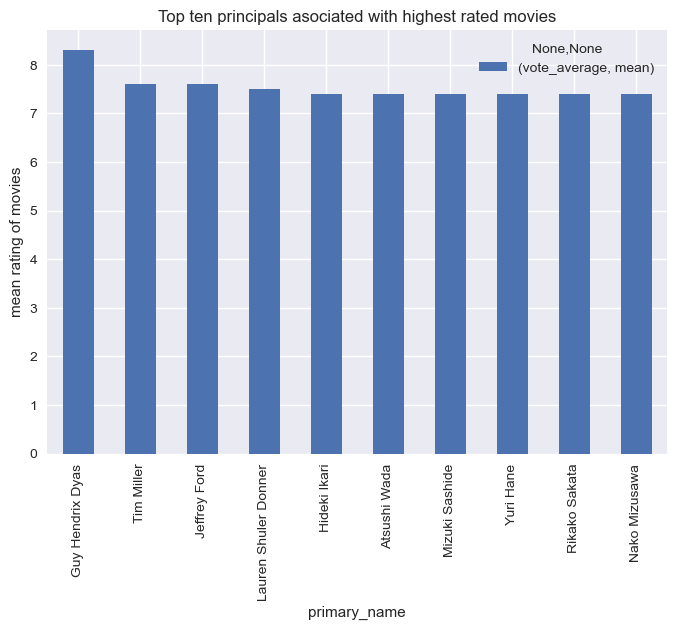

In [72]:
#Plot the top ten principals asociated with highest rated movies
movie_principals_grouped.iloc[:10].plot(kind='bar', y=movie_principals_grouped.columns[0])
plt.title('Top ten principals asociated with highest rated movies')
plt.ylabel('mean rating of movies');

**Reccomendations**
1. Based on the analysis, Microsoft should source more movies with a bias for Romance, Drama, and Animation genres for their new movie studio. 
2. Microsoft new movie studio should make block buster films (i.e. high budget movies) since there is a direct relationship between production budget and gross revenues raked in by such movies 
3. The movies should star top movie principals especialy:
        Guy Hendric Dyas
        Tim Miller
        Jeffrey Ford
        Lauren Shuler Donner
        Hideki Ikari
        Atsushi Wada
        Mizuki Sashide
        Yuri Hane
        Rikako Sakata
        Nako Mizusawa